In [2]:
import pandas as pd
import numpy as np

features = np.array([[1, 1, 1],
                    [2, 2, 2],
                    [3, 3, 1],
                    [4, 4, 0],
                    [5, 5, 1],
                    [6, 6, 0],
                    [7, 7, 1],
                    [8, 7, 0],
                    [9, 7, 1]])

df = pd.DataFrame(features)

# Create correlation matrix
corr_matrix = df.corr().abs()
print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
upper

np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

          0         1         2
0  1.000000  0.976103  0.410792
1  0.976103  1.000000  0.463713
2  0.410792  0.463713  1.000000


array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

In [3]:
# Find index of feature columns with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
df.drop(df.columns[to_drop], axis=1).head(15)

,0,2
0,1,1
1,2,2
2,3,1
3,4,0
4,5,1
5,6,0
6,7,1
7,8,0
8,9,1


In [4]:
df.corr()

,0,1,2
0,1.000000,0.976103,-0.410792
1,0.976103,1.000000,-0.463713
2,-0.410792,-0.463713,1.000000


In [5]:
upper

,0,1,2
0,NaN,0.976103,0.410792
1,NaN,NaN,0.463713
2,NaN,NaN,NaN


In [6]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [8]:
iris = load_iris()
features = iris.data
target = iris.target

In [15]:
type(features)

numpy.ndarray

In [14]:
features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [21]:
features=features.astype(int)

In [24]:
type(features)

numpy.ndarray

In [25]:
features[:5]

array([[5, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [4, 3, 1, 0],
       [5, 3, 1, 0]])

In [27]:
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)

In [28]:
print('Original number of features:', features.shape[1])
print('Reduced number of features:', features_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


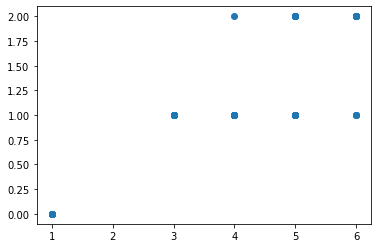

In [34]:
import matplotlib.pyplot as plt

plt.scatter(features_kbest[:, 0], features_kbest[:, 1])

In [35]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [45]:
kbest = SelectKBest(chi2, k=20)
X_new = kbest.fit_transform(X, y)
X_new.shape

(1797, 20)

In [47]:
kbest.pvalues_

array([            nan, 5.81310493e-169, 0.00000000e+000, 1.17740541e-144,
       8.11314242e-089, 0.00000000e+000, 0.00000000e+000, 2.97727113e-251,
       3.20626273e-003, 0.00000000e+000, 0.00000000e+000, 4.41344943e-078,
       1.02825052e-171, 0.00000000e+000, 0.00000000e+000, 8.18335060e-123,
       4.41080315e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.23435651e-075,
       5.44163062e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.45801029e-005,
                   nan, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000,             nan,
       2.65875300e-026, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.49452723e-062,
       1.27145348e-011, 3.28604761e-091, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [48]:
kbest.scores_

array([          nan,  811.90700411, 3501.28249552,  698.9252572 ,
        438.52969882, 3879.81925999, 3969.45823205, 1193.5608181 ,
         24.79521396, 2953.83108764, 2583.65198939,  388.24205944,
        824.69094853, 3676.48924765, 1983.5796061 ,  597.24198237,
          8.95886124, 1924.21690377, 2409.27140681, 3556.31594594,
       4871.94194551, 4782.19921618, 2155.17378998,  376.76583333,
          7.90090158, 2471.82418401, 4515.48149826, 2986.64314847,
       3724.09567634, 3208.64686641, 5138.07412439,   35.71270718,
                 nan, 5688.25079535, 5262.46646904, 3165.0605867 ,
       3231.63943369, 2532.99695611, 3288.81403655,           nan,
        142.85082873, 3863.85787901, 6416.0867248 , 5448.25154235,
       4079.73153383, 2134.02540236, 4486.34097862,  313.53898127,
         70.39927392,  449.72327313, 2801.97224468, 1527.54519627,
       1653.15892311, 3073.99803898, 5251.21748723,  683.88227339,
          9.15254237,  851.06791492, 3800.2473108 ,  730.92975

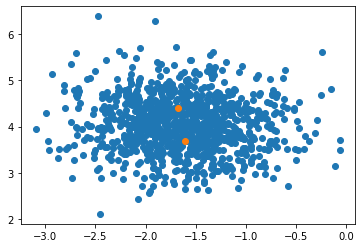

In [55]:
# Evaluating clustering models

import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)
plt.scatter(features[:, 0], features[:, 1])

model = KMeans(n_clusters=2, random_state=1).fit(features)

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1])

In [57]:
# Get predicted classes
target_predicted = model.labels_
target_predicted

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [58]:
# Evaluate mode
silhouette_score(features, target_predicted)


0.8916265564072141